In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz 
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer as DV
import time

In [2]:
bank_data = pd.read_csv("data/bank-full.csv",delimiter=';')
features = list(bank_data.columns.values)
numeric_col = ['age','balance','day','duration','campaign','pdays','previous']
x_num_train = bank_data[numeric_col].as_matrix()

#categorical columns
bank_train = bank_data.drop(numeric_col+['y'],axis = 1)
x_bank_train = bank_train.T.to_dict().values()

#vectorize
vectorizer = DV( sparse = False )
vec_x_bank_train = vectorizer.fit_transform( x_bank_train )
feature_train = np.hstack(( x_num_train, vec_x_bank_train ))

#y
label_train = bank_data.as_matrix(columns=['y'])

# sample part of data to reduce computing time
train_X,test_X,train_y,test_y = train_test_split(feature_train,label_train,test_size=0.5,random_state=0)

train_X,test_X,train_y,test_y = train_test_split(train_X,train_y,test_size=0.2,random_state=0)
train_X,val_X,train_y,val_y = train_test_split(train_X,train_y,test_size=0.2,random_state=0)



C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [3]:
accuracy = dict()
best_tree = None
best_info = (0,0,None)
for d in range(1,40):
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=d)
    clf_gini.fit(train_X,train_y)
    
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state =0,
                               max_depth=d)
    clf_entropy.fit(train_X,train_y)
    
    gini_predict = clf_gini.predict(val_X)
    entropy_predict = clf_entropy.predict(val_X)
    train_gini_predict = clf_gini.predict(train_X)
    train_entropy_predict = clf_entropy.predict(train_X)
    
    g_accuracy = accuracy_score(gini_predict, val_y)
    e_accuracy = accuracy_score(entropy_predict,val_y) 
    train_g_accuracy = accuracy_score(train_gini_predict,train_y)
    train_e_accuracy = accuracy_score(train_entropy_predict ,train_y)
    accuracy[d] = (g_accuracy,e_accuracy,train_g_accuracy,train_e_accuracy)
    
    best_temp = (0,None)
    if g_accuracy > e_accuracy:
        best_temp = (g_accuracy,'gini')
    else:
        best_temp = (e_accuracy,'entropy')
    if best_temp[0] > best_info[0]:
        best_info = (best_temp[0],d,best_temp[1])

In [4]:
list_g = list()
list_e = list()
train_list_g = list()
train_list_e = list()
for k,v in accuracy.items():
    print("depth: ",k,", entropy accuracy: ",v[1],", gini accuracy: ",v[0])
    list_g.append(v[0])
    list_e.append(v[1])
    train_list_g.append(v[2])
    train_list_e.append(v[3])
print ("best tree: depth: ",best_info[1],", split function: ",best_info[2],", accuracy: ",best_info[0])

depth:  1 , entropy accuracy:  0.881393419961294 , gini accuracy:  0.881393419961294
depth:  2 , entropy accuracy:  0.8918993641139066 , gini accuracy:  0.892175836328449
depth:  3 , entropy accuracy:  0.9029582526956041 , gini accuracy:  0.9029582526956041
depth:  4 , entropy accuracy:  0.8996405861210949 , gini accuracy:  0.9004700027647221
depth:  5 , entropy accuracy:  0.9059994470555709 , gini accuracy:  0.9073818081282831
depth:  6 , entropy accuracy:  0.8999170583356373 , gini accuracy:  0.9024053082665192
depth:  7 , entropy accuracy:  0.8988111694774675 , gini accuracy:  0.8999170583356373
depth:  8 , entropy accuracy:  0.8996405861210949 , gini accuracy:  0.9001935305501797
depth:  9 , entropy accuracy:  0.8946640862593309 , gini accuracy:  0.8952170306884158
depth:  10 , entropy accuracy:  0.8888581697539397 , gini accuracy:  0.8938346696157036
depth:  11 , entropy accuracy:  0.8924523085429914 , gini accuracy:  0.8910699474702792
depth:  12 , entropy accuracy:  0.8918993641

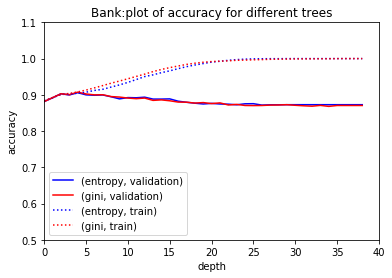

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(range(len(list_e)),list_e,'b-',label="(entropy, validation)")
plt.plot(range(len(list_g)),list_g,'r-',label="(gini, validation)")
plt.plot(range(len(list_e)),train_list_e,'b:',label="(entropy, train)")
plt.plot(range(len(list_g)),train_list_g,'r:',label="(gini, train)")
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('Bank:plot of accuracy for different trees')
plt.legend()
plt.axis([0,40,0.5,1.1])
plt.show()
plt.savefig("DT_bank_1.jpg")

In [6]:
clf = DecisionTreeClassifier(criterion = best_info[2], random_state = 0,
                               max_depth=best_info[1])
clf.fit(train_X,train_y)
predict = clf.predict(test_X)
accuracy = accuracy_score(predict,test_y)
print("bset tree test accurcy: ",accuracy)

bset tree test accurcy:  0.9066578190665782


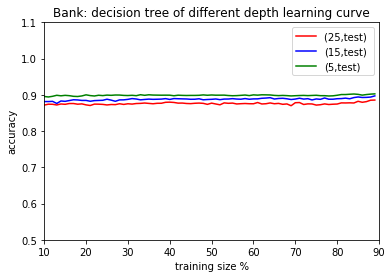

In [7]:
deep_grow_accuracy = list()
middle_grow_accuracy = list()
small_grow_accuracy = list()
train_1 = list()
train_2 = list()
train_3 = list()
for p in range(10,90):
    train_X,test_X,train_y,test_y = train_test_split(feature_train,label_train, random_state=0, test_size= 1-p/100)
    
    deep_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=25)
    deep_clf_gini.fit(train_X,train_y)
    deep_gini_predict = deep_clf_gini.predict(test_X)
    deep_g_accuracy =accuracy_score(deep_gini_predict ,test_y) 
    deep_grow_accuracy.append(deep_g_accuracy)
    
   
    middle_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=15)
    middle_clf_gini.fit(train_X,train_y)
    middle_gini_predict = middle_clf_gini.predict(test_X)
    middle_g_accuracy = accuracy_score(middle_gini_predict, test_y)
    middle_grow_accuracy.append(middle_g_accuracy)
    

    small_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=5)
    small_clf_gini.fit(train_X,train_y)
    small_gini_predict = small_clf_gini.predict(test_X)
    small_g_accuracy = accuracy_score(small_gini_predict,test_y)
    small_grow_accuracy.append(small_g_accuracy)

plt.plot(range(10,90),deep_grow_accuracy,'r-',label="(25,test) ")
plt.plot(range(10,90),middle_grow_accuracy,'b-',label="(15,test)")
plt.plot(range(10,90),small_grow_accuracy,'g-',label="(5,test)")
plt.xlabel('training size %')
plt.ylabel('accuracy')
plt.title('Bank: decision tree of different depth learning curve')
plt.axis([10,90,0.5,1.1])
plt.legend()
plt.savefig("DT_bank_2.jpg")
plt.show()

In [8]:
train_X,test_X,train_y,test_y = train_test_split(feature_train,label_train,test_size=0.5,random_state=0)
train_X,test_X,train_y,test_y = train_test_split(train_X,train_y,test_size=0.2,random_state=0)
start = time.clock()
model = DecisionTreeClassifier(criterion = "gini", random_state = 0,max_depth=5)
model.fit(train_X,train_y)
predict = model.predict(test_X)
elapsed = (time.clock() - start)
print("decision tree model accuracy: ",accuracy_score(predict,test_y),"time used : ",elapsed)

C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


decision tree model accuracy:  0.9055518690555187 time used :  0.19476239999994505
